# P2: Investigate a Dataset

### Source: 2014 Lahman’s Baseball Database.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import Salaries data
filename = 'Salaries.csv'
salariesDF = pd.read_csv(filename)

# import Players data
filename = 'AwardsSharePlayers.csv'
playersDF = pd.read_csv(filename)

print salariesDF.head(), "\n"
print playersDF.head()

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000 

    awardID  yearID lgID   playerID  pointsWon  pointsMax  votesFirst
0  Cy Young    1956   ML   fordwh01          1         16           1
1  Cy Young    1956   ML  maglisa01          4         16           4
2  Cy Young    1956   ML  newcodo01         10         16          10
3  Cy Young    1956   ML  spahnwa01          1         16           1
4  Cy Young    1957   ML  donovdi01          1         16           1






And I am going to see if there is any null value in the data.
First salaries data.

In [26]:
print pd.isnull(salariesDF).sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64


In [27]:
print salariesDF.describe()

             yearID           salary
count  24758.000000     24758.000000
mean    1999.891752   1932904.790169
std        8.324492   3190333.601862
min     1985.000000         0.000000
25%     1993.000000    260000.000000
50%     2000.000000    525000.000000
75%     2007.000000   2199643.000000
max     2014.000000  33000000.000000






Although there is no null value in the data, there are some zeros in salary column. I am going to find these rows with zero salary.

In [28]:
print salariesDF[salariesDF["salary"] == 0]

       yearID teamID lgID   playerID  salary
6179     1993    NYA   AL  jamesdi01       0
12007    1999    PIT   NL  martija02       0





There are total two players with 0 salary. I am going to find more details about those two players.

In [29]:
print salariesDF[salariesDF["playerID"] == "jamesdi01"]

      yearID teamID lgID   playerID  salary
1302    1987    ATL   NL  jamesdi01  120000
1929    1988    ATL   NL  jamesdi01  360000
2591    1989    ATL   NL  jamesdi01  400000
3536    1990    CLE   AL  jamesdi01  650000
5293    1992    NYA   AL  jamesdi01  387500
6179    1993    NYA   AL  jamesdi01       0
8019    1995    NYA   AL  jamesdi01  350000


In [30]:
print salariesDF[salariesDF["playerID"] == "martija02"]

       yearID teamID lgID   playerID  salary
11011    1998    PIT   NL  martija02  170000
12007    1999    PIT   NL  martija02       0





Clearly for jamesdi01, the 0 value is wrong. I am going to assume the salary in 1993 as the average of 1992 and 1995. For martija02, I will ignore these two rows from the database.



In [31]:
# Taking care of jamesdi01
salariesDF["salary"].iloc[6179] = (387500 + 350000) / 2
print salariesDF[salariesDF["playerID"] == "jamesdi01"]

      yearID teamID lgID   playerID  salary
1302    1987    ATL   NL  jamesdi01  120000
1929    1988    ATL   NL  jamesdi01  360000
2591    1989    ATL   NL  jamesdi01  400000
3536    1990    CLE   AL  jamesdi01  650000
5293    1992    NYA   AL  jamesdi01  387500
6179    1993    NYA   AL  jamesdi01  368750
8019    1995    NYA   AL  jamesdi01  350000


In [32]:
# Taking care of martija02
salariesDF = salariesDF[salariesDF["playerID"] != "martija02"]
print salariesDF.describe()

             yearID           salary
count  24756.000000     24756.000000
mean    1999.891865   1933068.974996
std        8.324817   3190410.980033
min     1985.000000     10900.000000
25%     1993.000000    260000.000000
50%     2000.000000    525000.000000
75%     2007.000000   2200000.000000
max     2014.000000  33000000.000000


Now I am going to clean the AwardsSharePlayers data.

In [80]:
# Printout the total number of null values of each column
print pd.isnull(playersDF).sum()
print playersDF.describe()

awardID         0
yearID          0
lgID            0
playerID        0
pointsWon       0
pointsMax       0
votesFirst    358
dtype: int64
            yearID    pointsWon    pointsMax   votesFirst
count  6705.000000  6705.000000  6705.000000  6347.000000
mean   1971.344817    43.168829   266.107233     1.612573
std      27.172773    67.714919   128.980771     4.868226
min    1911.000000     0.000000    16.000000     0.000000
25%    1950.000000     4.000000   140.000000     0.000000
50%    1974.000000    12.000000   336.000000     0.000000
75%    1994.000000    52.000000   336.000000     0.000000
max    2014.000000   448.000000   448.000000    32.000000


Although there are 358 null values in "votesFirst" column, I don't plan to use this column. Since other columns don't have a null value, I can leave this data as it is.

Now salary is investigated using the single-variable (1d) exploration

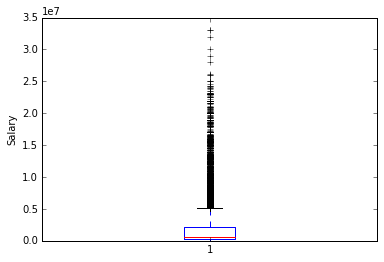

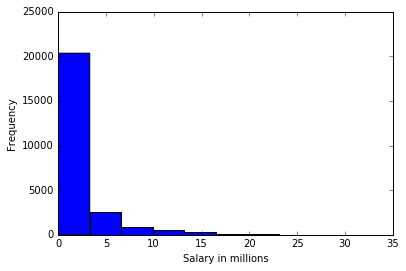

In [70]:
# single-variable investigation - Salary
# plot boxplot and histogram
plt.boxplot(salariesDF["salary"])
plt.ylabel("Salary")
plt.show()
plt.hist(salariesDF["salary"]/1000000, bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Salary in millions")
plt.show()

In histogram, you can see that the most of the salaries are below 5 millions and very little number of people are more than 5 millions range.
However, the box plot is very difficult to understand because there are too many points and most of them seem to be outliers. In order to decrease the number of points, the set of the mean salaries per year is used to plot the boxplot.

In [56]:
# Get a dataframe of the set of the mean salaries per year
salaryYearDF = salariesDF[["yearID","salary"]].groupby("yearID").mean()
print salaryYearDF

         salary
yearID         
1985     476299
1986     417147
1987     434729
1988     453171
1989     506323
1990     511973
1991     894961
1992    1047520
1993     977366
1994    1049588
1995     964979
1996    1027909
1997    1218687
1998    1281958
1999    1486794
2000    1992984
2001    2279841
2002    2392526
2003    2573472
2004    2491776
2005    2633830
2006    2834520
2007    2941435
2008    3136517
2009    3277646
2010    3278746
2011    3318838
2012    3458421
2013    3723344
2014    3980445


Now plot the boxplot using this dataframe.

salary    1739889
dtype: float64


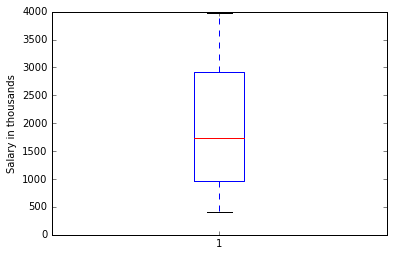

Mean: 1902124.83333
Median: 1739889.0


In [81]:
# plotting box plot and histogram
print salaryYearDF.median()
plt.boxplot(salaryYearDF.values / 1000)
plt.ylabel("Salary in thousands")
plt.show()

meanYearDF = float(salaryYearDF.mean())
medianYearDF = float(salaryYearDF.median())
print "Mean:", meanYearDF
print "Median:", medianYearDF

Mean is greater than Median as expected since the historam above shows the right skewed graph. 



Now I am going to investigate the relation between the teamID and salaries.
Find sum, max, min, mean of salaries by team ids.

In [11]:
# Database with two columns: teamID and salary
salariesDF_reduced = salariesDF[["teamID","salary"]]

salariesDF_summary_by_teamID = salariesDF_reduced.groupby("teamID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_summary_by_teamID.columns = ["sum", "max", "min", "mean"]
print salariesDF_summary_by_teamID.head()

               sum       max     min     mean
teamID                                       
ANA      468091973  13166667  150000  1895109
ARI     1209975228  16000000  170000  2499948
ATL     1882946784  16061802   60000  2184393
BAL     1630200038  17000000   60000  1846206
BOS     2432700935  22500000   60000  2755040


In [17]:
def bargraph(column): # column = sum, max, min, mean
	frequency = salariesDF_summary_by_teamID[column].sort_values(axis=0, ascending = False).head(10)
	objects = frequency.index
	y_pos = np.arange(len(objects))
	plt.bar(y_pos, frequency, align='center')
	plt.xticks(y_pos, objects)
	plt.ylabel('Salary')
	plt.title("Top 10 {} of salaries by teamID".format(column))
	print "Top 10 {} of salaries by teamID".format(column)
	print frequency
	plt.show()




Change False to True to see the bargraphs.

Top 10 sum of salaries by teamID
teamID
NYA    3283488084
BOS    2432700935
LAN    2237766703
PHI    1982355800
NYN    1965737231
ATL    1882946784
CHN    1859833315
SLN    1775631332
DET    1771197687
CHA    1699865143
Name: sum, dtype: int64


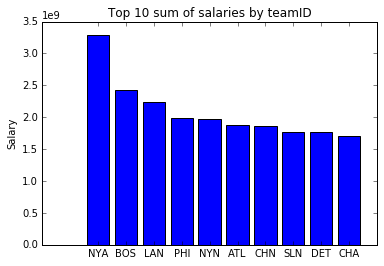

Top 10 max of salaries by teamID
teamID
NYA    33000000
LAA    26187500
LAN    26000000
PHI    25000000
TEX    24000000
SEA    24000000
NYN    23145011
DET    23000000
MIN    23000000
BOS    22500000
Name: max, dtype: int64


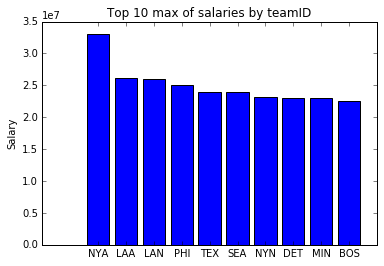

Top 10 min of salaries by teamID
teamID
NYM    501560
SFG    500500
MIA    480000
WAS    316000
LAA    316000
ARI    170000
MIL    170000
TBA    170000
ANA    150000
COL    109000
Name: min, dtype: int64


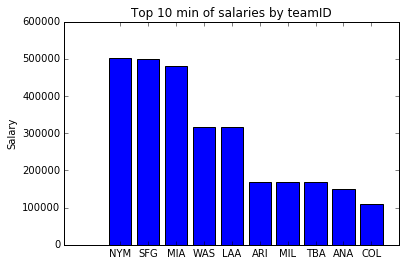

Top 10 mean of salaries by teamID
teamID
SFG    5315191
LAA    4186119
NYA    3735481
BOS    2755040
LAN    2505897
ARI    2499948
MIA    2480984
WAS    2466758
NYN    2345748
NYM    2283624
Name: mean, dtype: int64


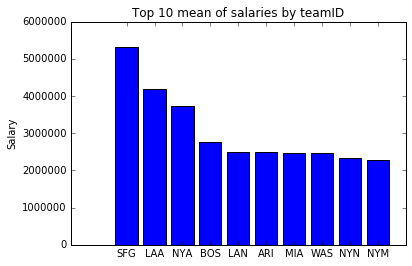

In [18]:
""" Bar graph of the number of players by teamID """
if True:
    %matplotlib inline
    bargraph("sum")
    bargraph("max")
    bargraph("min")
    bargraph("mean")


### multiple-variable (2d) explorations

I believe that the player' pointsWon affects salaries.
So I set the pointsWon as  independent variable and salary as dependent variable.

Set key value as (year, player ID) from salary dataframe and player dataframe.

In [101]:
# Set key value as (year, player ID)
print salariesDF["yearID"].to_frame().join(salariesDF["playerID"].to_frame())


       yearID   playerID
0        1985  barkele01
1        1985  bedrost01
2        1985  benedbr01
3        1985   campri01
4        1985  ceronri01
5        1985  chambch01
6        1985  dedmoje01
7        1985  forstte01
8        1985  garbege01
9        1985  harpete01
10       1985  hornebo01
11       1985  hubbagl01
12       1985  mahleri01
13       1985  mcmurcr01
14       1985  mumphje01
15       1985  murphda05
16       1985  oberkke01
17       1985  perezpa01
18       1985  perryge01
19       1985  ramirra01
20       1985  suttebr01
21       1985  washicl01
22       1985  boddimi01
23       1985  dauerri01
24       1985  davisst02
25       1985  dempsri01
26       1985  dwyerji01
27       1985  flanami01
28       1985   fordda01
29       1985  grosswa01
...       ...        ...
24728    2014  blevije01
24729    2014  cedenxa01
24730    2014  clippty01
24731    2014  desmoia01
24732    2014  detwiro01
24733    2014  espinda01
24734    2014  fistedo01
24735    2014  frandke01






This part is for looking at the trend of the salary change whether it increases or decreases.

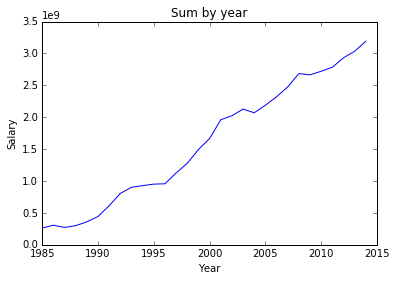

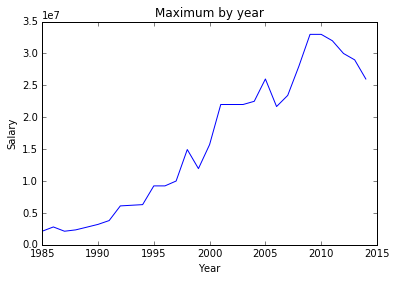

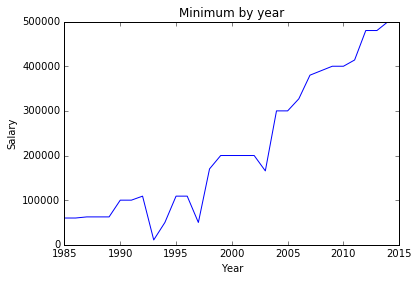

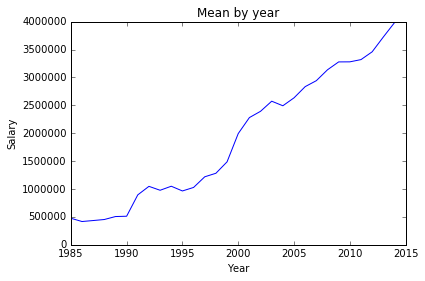

In [14]:
""" data by year """
salariesDF_by_year = salariesDF[["yearID","salary"]].groupby("yearID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_by_year.columns = ["sum", "max", "min", "mean"]

if True:
    %matplotlib inline
    plt.title('Sum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["sum"])
    plt.show()
    plt.title('Maximum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["max"])
    plt.show()
    plt.title('Minimum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["min"])
    plt.show()
    plt.title('Mean by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["mean"])
    plt.show()



All of these factors increase as year gets close to 2014. But when you look at the second graph there is a peak around at 2010 and I decided to analyze that.



In [15]:
""" Finding maximum year """
maxSalaryByYear = salariesDF_by_year["max"].argmax()
print "\nMaximum salary occurs in {}, $ {}\n".format(maxSalaryByYear, salariesDF_by_year["max"].loc[maxSalaryByYear])


Maximum salary occurs in 2009, $ 33000000



In [16]:
""" Find player with the maximum in 2009 """
maxDFyear = salariesDF[salariesDF["yearID"]==2009]
maxPlayer2009 = maxDFyear[maxDFyear["salary"] == salariesDF_by_year["max"].loc[maxSalaryByYear]]
maxPlayerID = maxPlayer2009["playerID"].values[0]
print maxPlayerID
print "Detailed information of the player"
print maxPlayer2009, "\n"


rodrial01
Detailed information of the player
       yearID teamID lgID   playerID    salary
20286    2009    NYA   AL  rodrial01  33000000 





The maximum value occurs in 2009 and the team id and player id is shown above. He had the highest salary of all time.



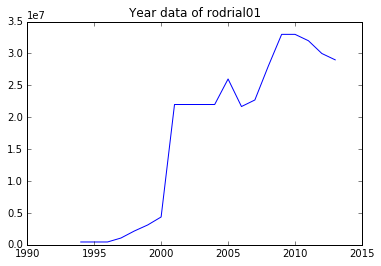

In [33]:
""" maximum player's yearly graph """
maxPlayerDF = salariesDF[salariesDF["playerID"] == maxPlayerID]

if True:
    %matplotlib inline
    plt.plot(maxPlayerDF["yearID"], maxPlayerDF["salary"])
    plt.title("Year data of {}".format(maxPlayerID))
    plt.show()



He started from very low salary and reached to the highest salary range in 2009. Although the salary goes down after 2010, he is the highest paid player.

The correlation between year and salary is calculated. The correlation will be between -1 and 1. I expect the range would be positive since there is an increase in salary as year goes to 2014.



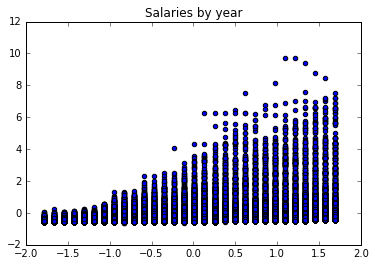

In [34]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","salary"]]

def standard(sr):
    return (sr - sr.mean())/sr.std(ddof=0)

standardizedDF = salaryYearDF.apply(standard)

if True:
    %matplotlib inline
    plt.scatter(standardizedDF["yearID"], standardizedDF["salary"])
    plt.title("Salaries by year")
    plt.show()

The code above first take yearID and salary columns and standardize those two columns. And then, the mean of product of each x coordinate and y coordinate is calculated. One interesting thing to note is that although the highest paid salaries is getting increased, the minimum salaries are almost consistent.



In [35]:
""" Calculating correlation """
correlation = (standardizedDF["yearID"] * standardizedDF["salary"]).mean()
print "Correlation between salaries and year:",correlation

Correlation between salaries and year: 0.345339080873


As expected the correlation comes out as a positive number. There is a positive correlation between year and players' salaries.



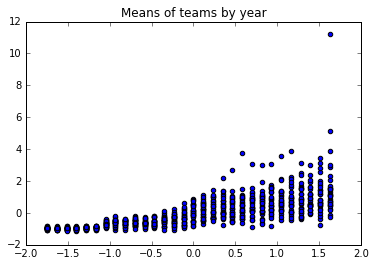

In [36]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","teamID","salary"]].groupby(["yearID","teamID"]).mean()

x = salaryYearDF.index.values
x = np.array(map(lambda x: int(x[0]), x))

y = salaryYearDF.values.reshape(1, len(salaryYearDF.values))[0]

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

if True:
    %matplotlib inline
    plt.scatter(x,y)
    plt.title("Means of teams by year")
    plt.show()

This graph is showing only the means of teams' salaries not the entire salaries of players. As you can see that the number of points have been reduced compared to the previous graph. The mean of each team is calculated by using "groupby" in pandas. Another notable difference is that the minimum salaries of each year is increasing. We might be able to expect more positive correlation. Since there will be less negative values when we calculate the mean.

In [37]:
""" Calculating correlation """
correlation = (x * y).mean()
print "Correlation between mean salaries by team and year:", correlation


Correlation between mean salaries by team and year: 0.725273264404




As expected, the correlation is calculated to be a positive number and is greater than the previous correlation value. So there is an obvious trend of increase in salaries.

Lastly, I decide to find the highest paid basedball team in 2014 because when you look at the scatter plot above, the highest paid team in 2014 is the highest paid of all time.



In [38]:
""" Find the country with the maximum mean in 2014 """
salaryYearDF = pd.DataFrame((salaryYearDF.index.values), index =np.array(range(len(salaryYearDF))), columns = ["mean"])

salaryYearDFyear = salaryYearDF["mean"].map(lambda x: x[0])
salaryYearDFteam = salaryYearDF["mean"].map(lambda x: x[1])
salaryYearDFsalary = pd.DataFrame(y, index =np.array(range(len(salaryYearDF))), columns = ["mean"])

maxidxSalary2014 = salaryYearDFsalary[salaryYearDFyear == 2014].idxmax()
maxTeam2014 = salaryYearDFteam[maxidxSalary2014.values[0]]
print "Team with the maximum mean of salaries in 2014:", maxTeam2014


Team with the maximum mean of salaries in 2014: SFN
